# Topic Model

In [5]:
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups

In [7]:
n_feature = 1000 # Number of word to remain
n_components = 10 # Number of topic
n_top_words = 20 # Visualization word for each topic

n_samples = 2000 # Use only 2000 sample

In [9]:
def plot_top_words(model, feature_names, n_top_words, title):
  fig, axes   = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
  axes = axes.flatten()
  for topic_idx, topic in enumerate(model.components_):
    top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
    top_features = [feature_names[i] for i in top_features_ind]
    weights = topic[top_features_ind]

    ax = axes[topic_idx]
    ax.barh(top_features, weights, height=0.7)
    ax.set_title(f'Topic: {topic_idx+1}', fontdict={'fontsize':30})

    ax.invert_yaxis()
    ax.tick_params(axis='both', which='major', labelsize=20)
    for i in 'top right left'.split():
      ax.spines[i].set_visible(False)
    fig.suptitle(title, fontsize=40)
  plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
  plt.show()

In [10]:
data, _ = fetch_20newsgroups(shuffle=True, random_state=1,
                             remove=('headers', 'footers', 'quotes'),
                             return_X_y=True)

In [11]:
data_sampels = data[:n_samples]

# Maxtrix factorization

In [15]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=n_feature,
                                   stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(data_sampels)

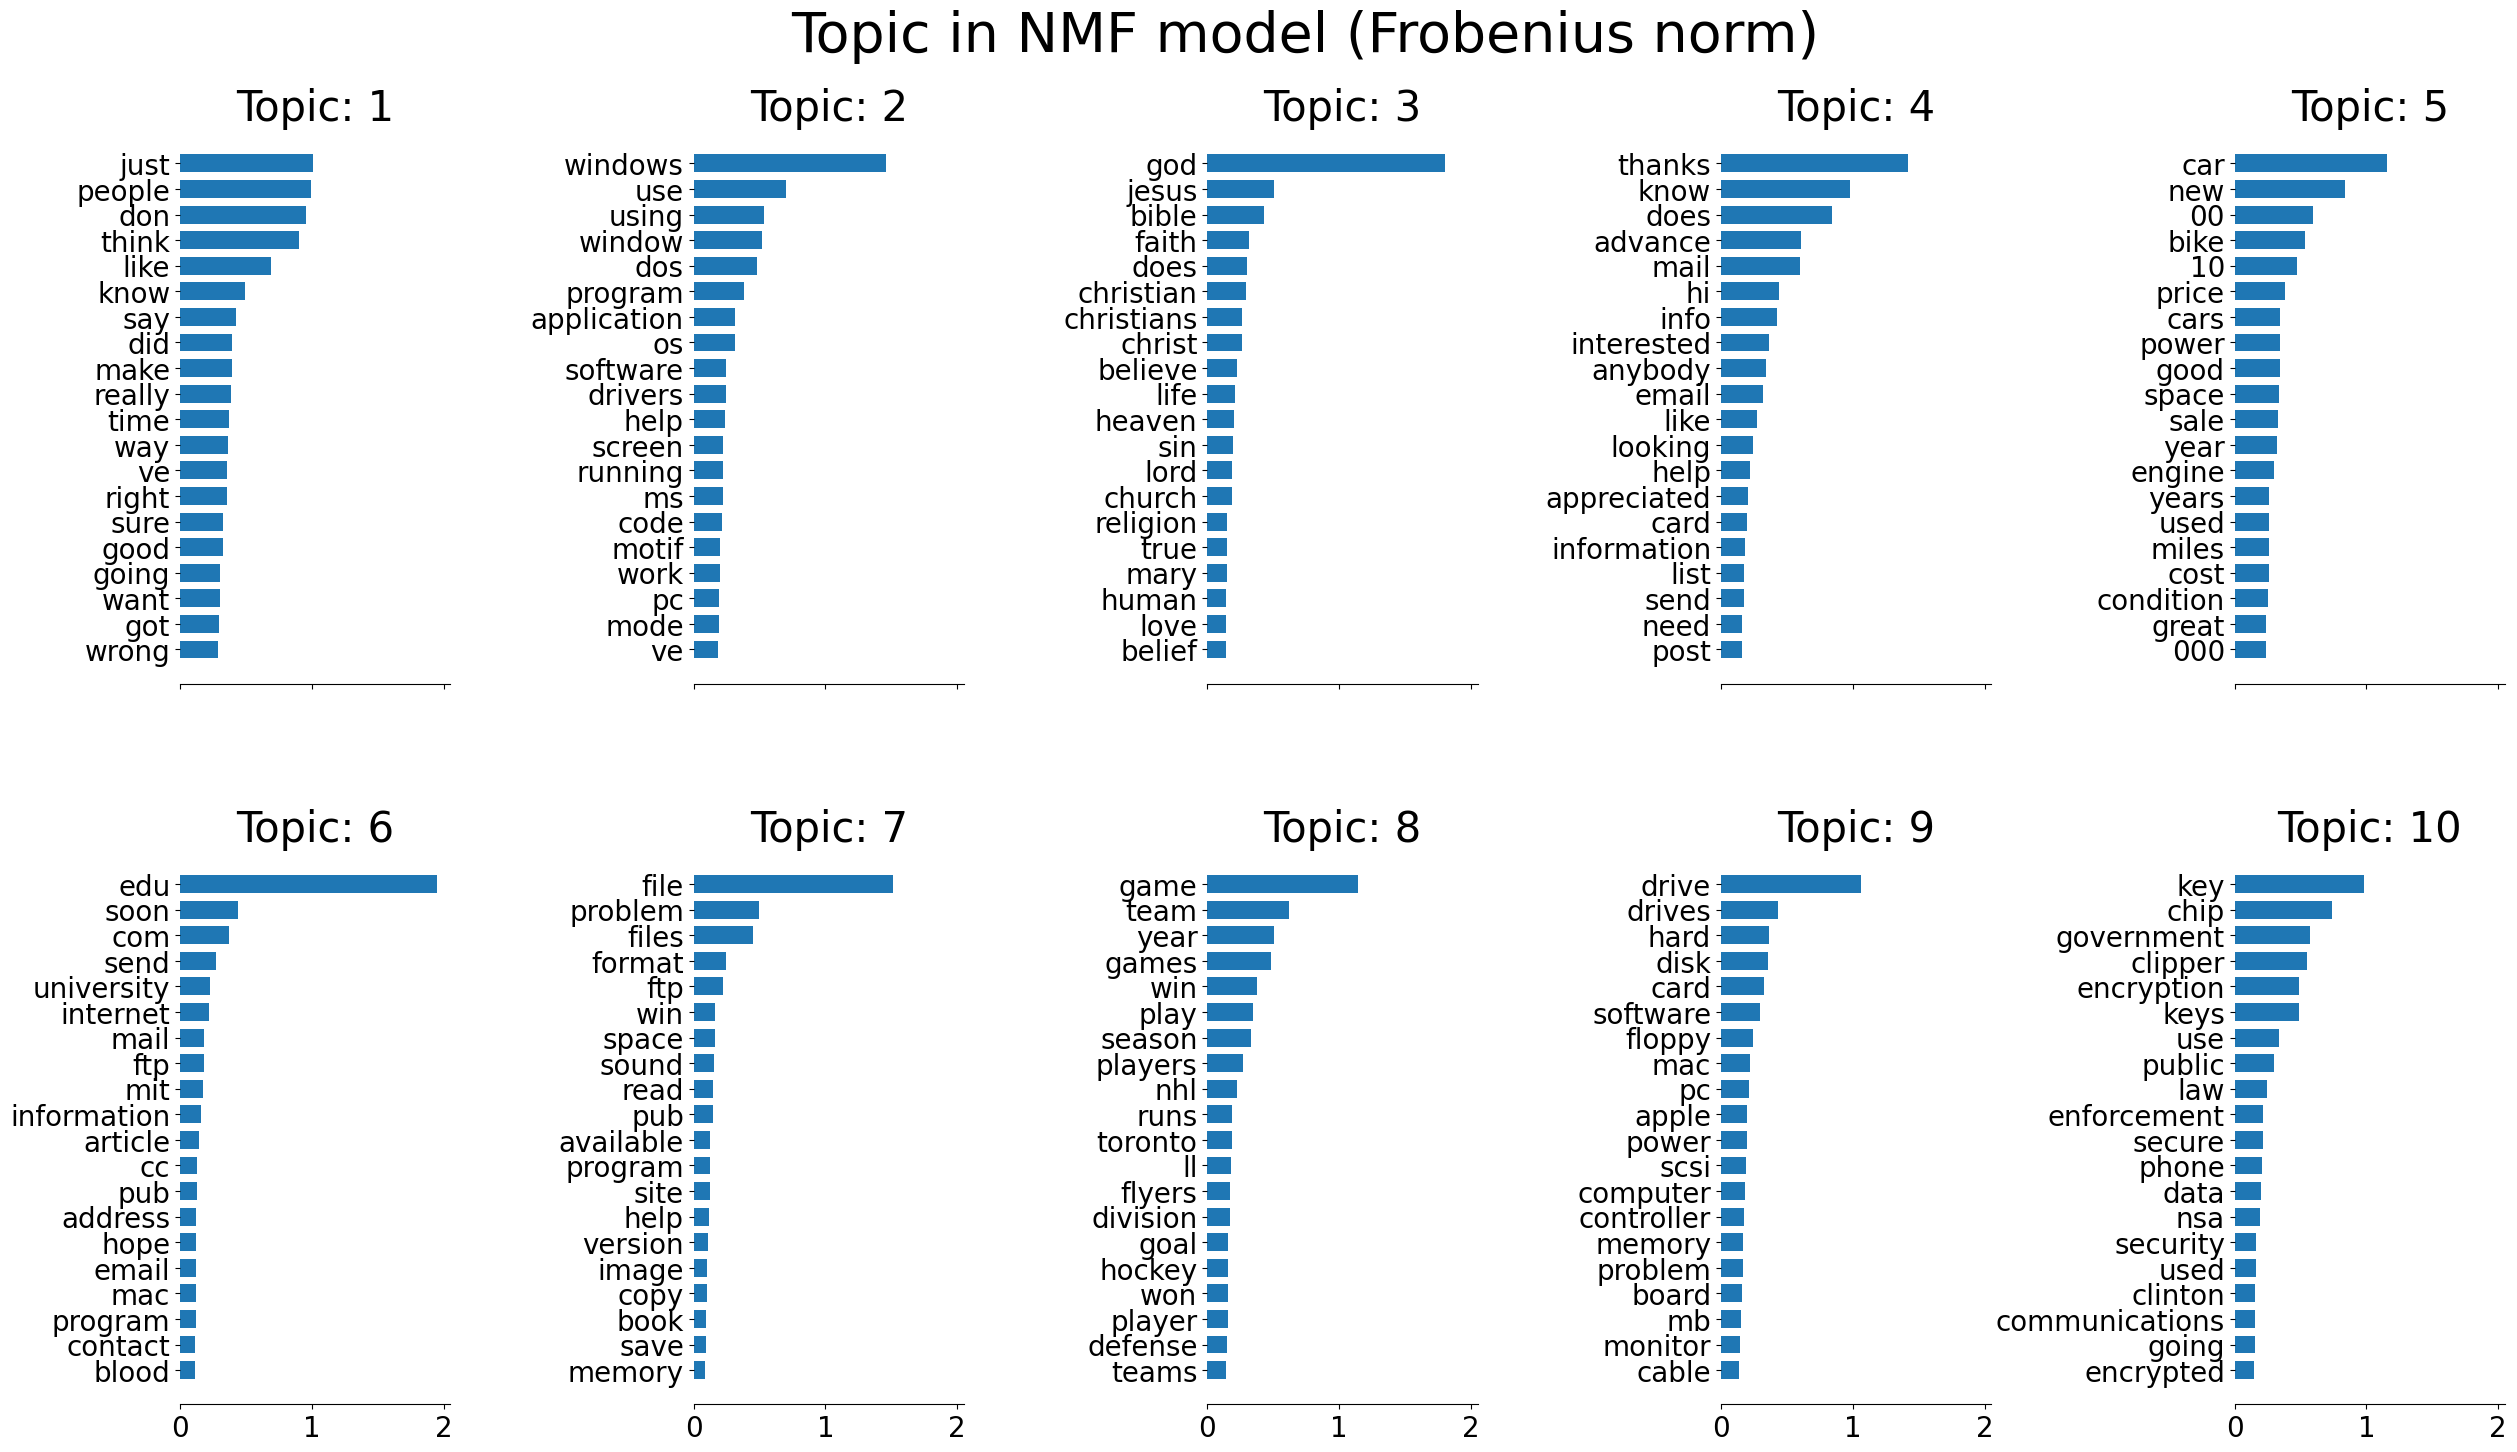

In [22]:
nmf = NMF(n_components=n_components, random_state=1, l1_ratio=0.5).fit(tfidf)

tfidf_topic_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(nmf, tfidf_topic_names, n_top_words, "Topic in NMF model (Frobenius norm)")

In [34]:
nmf.transform(tfidf[:10]) # Focus on first ten documents

array([[4.26744463e-02, 0.00000000e+00, 4.08207843e-03, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 4.04503492e-03, 0.00000000e+00,
        1.00903200e-02, 1.96570447e-02],
       [4.69618523e-02, 0.00000000e+00, 2.99325016e-02, 8.13632716e-03,
        3.65951997e-03, 9.28486575e-03, 1.01251994e-04, 2.04314067e-02,
        4.53904370e-02, 0.00000000e+00],
       [5.78382858e-02, 1.20567433e-04, 0.00000000e+00, 1.35788613e-02,
        2.37381774e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.02167510e-04, 2.13685322e-03, 0.00000000e+00,
        3.02103336e-02, 0.00000000e+00, 0.00000000e+00, 2.26929515e-02,
        6.55489588e-02, 1.70167358e-01],
       [3.94759875e-02, 0.00000000e+00, 1.29852547e-02, 4.79564975e-02,
        2.13680405e-02, 9.12396119e-02, 0.00000000e+00, 1.22474521e-02,
        0.00000000e+00, 0.00000000e+00],
       [2.77812245e-02, 0.00000000e+00, 3.46654121e-02, 0.00000000e+00,
   

In [38]:
print(len(nmf.components_[0]), len(
tfidf_topic_names))

1000 1000


In [39]:
len(nmf.components_)

10

# LDA

In [40]:
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=n_feature,
                                stop_words='english')
tf = tf_vectorizer.fit_transform(data_sampels)

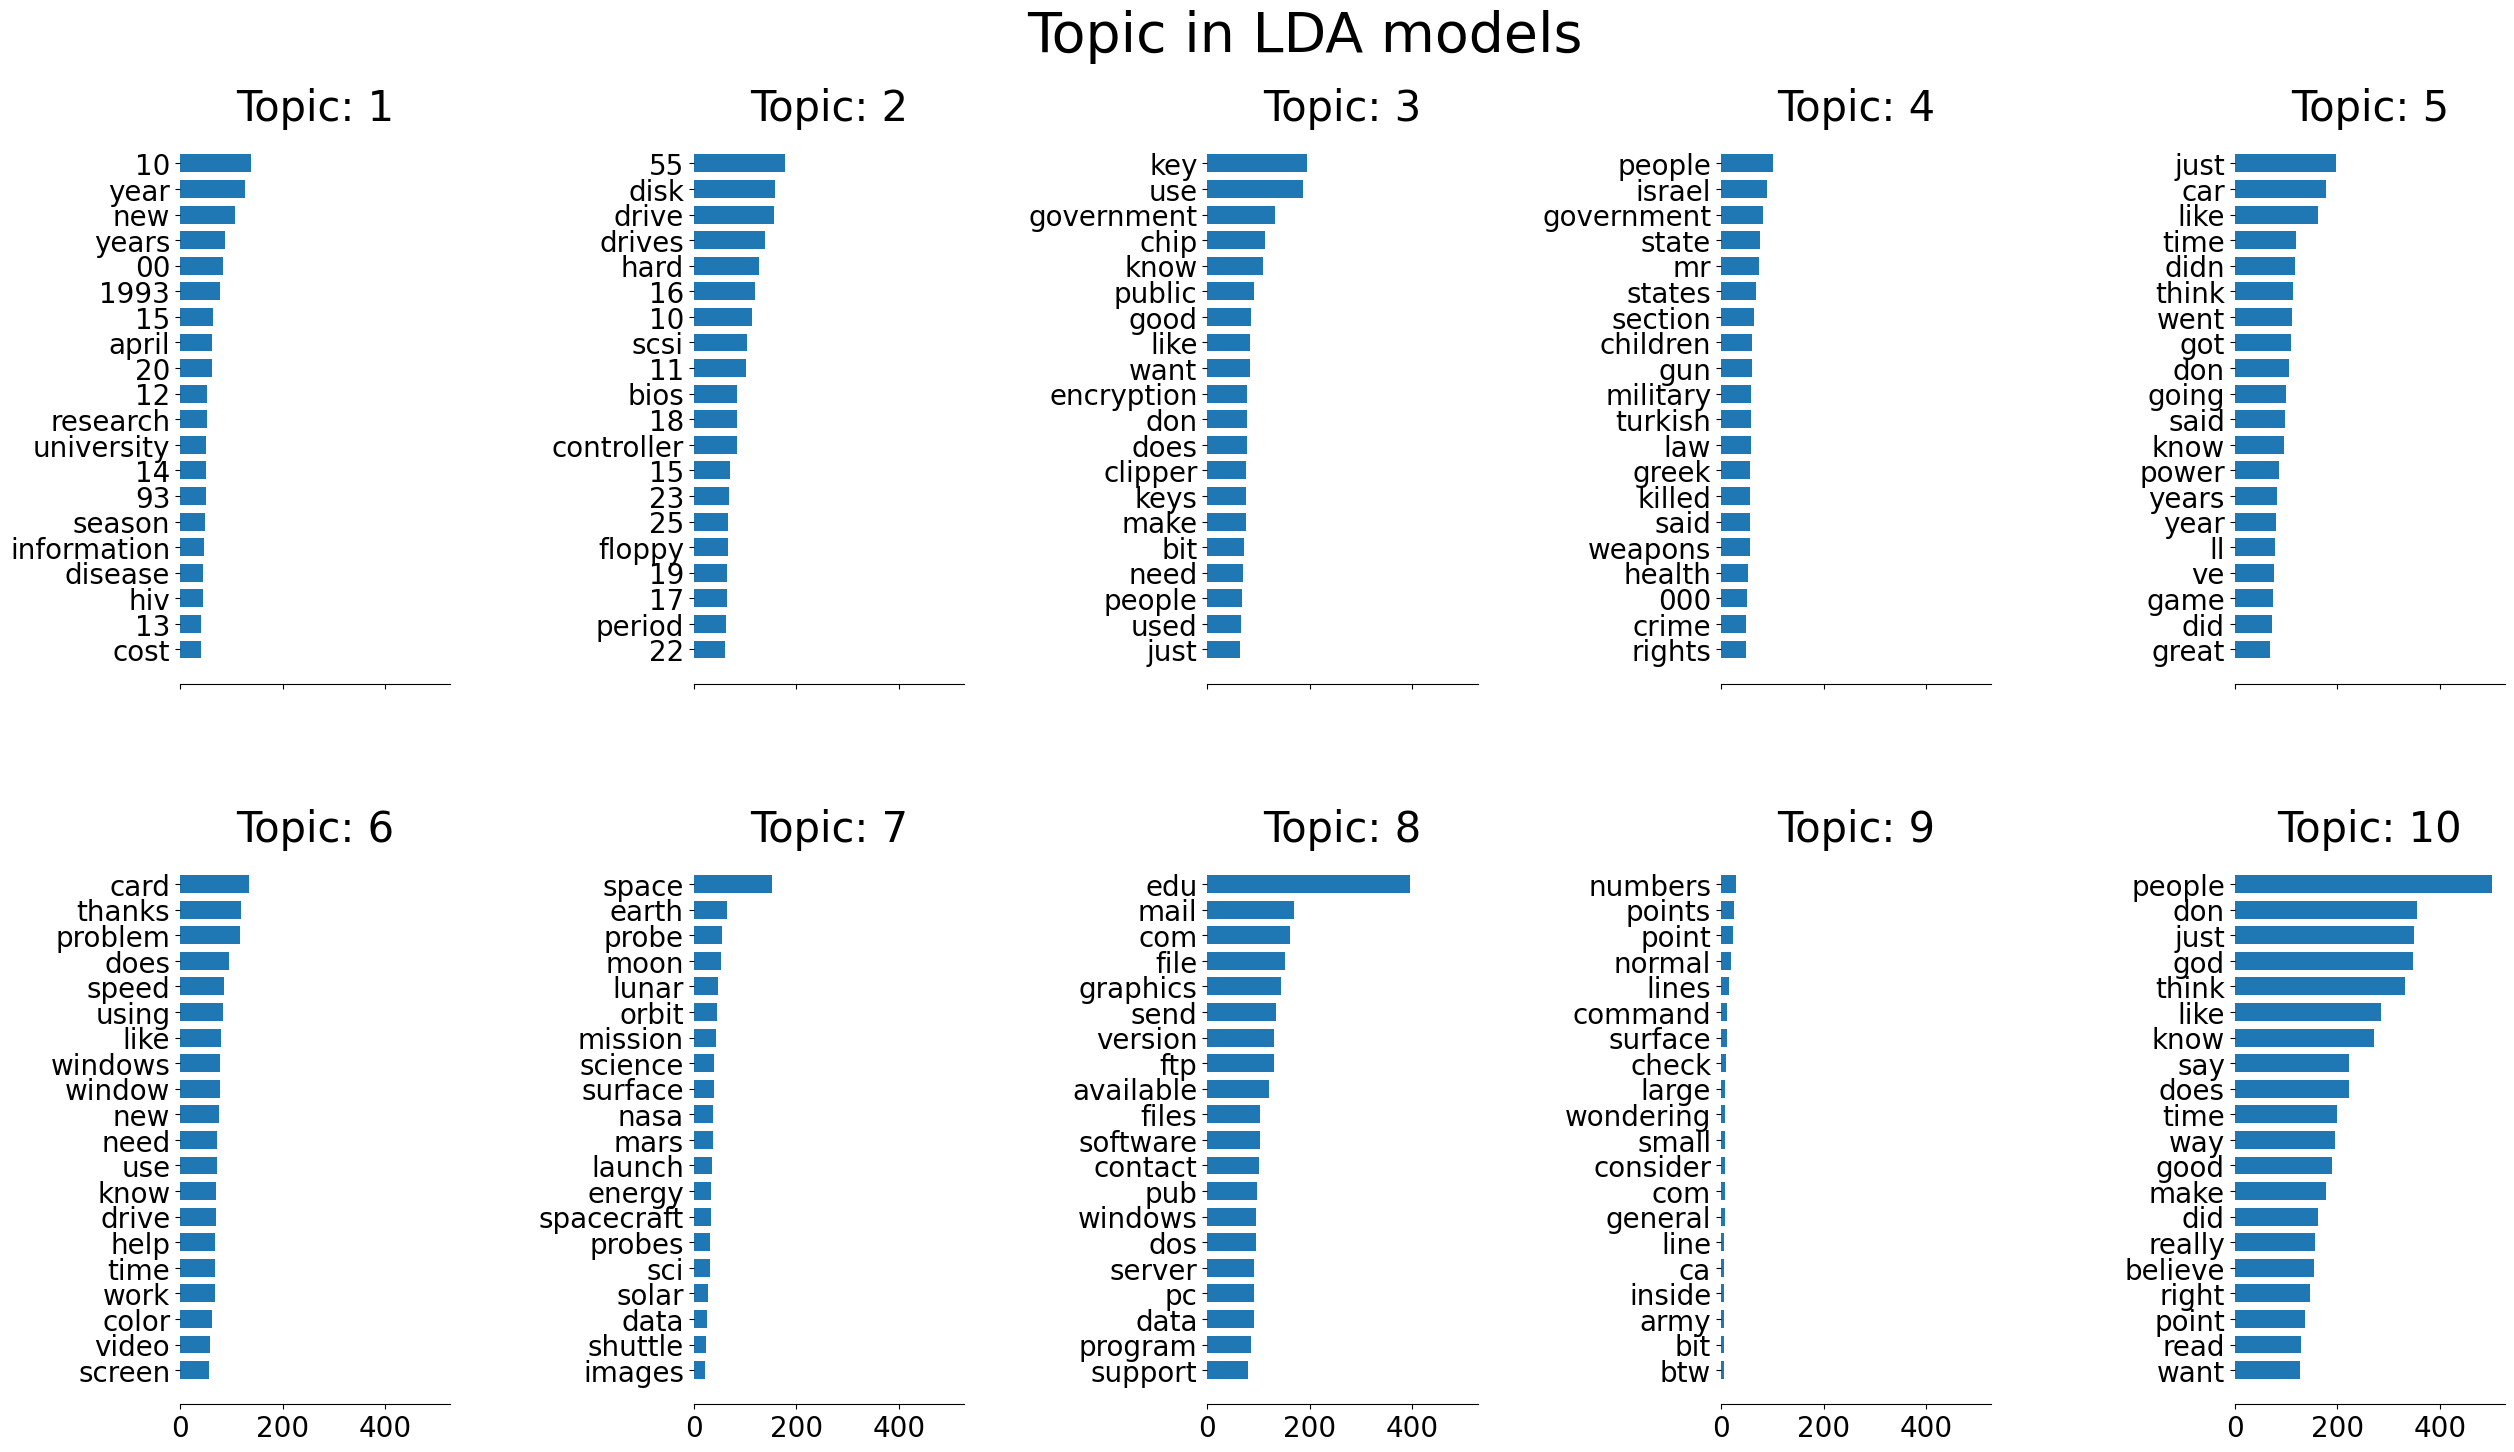

In [44]:
lda = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=1)
lda.fit(tf)

tf_feature_names = tf_vectorizer.get_feature_names_out()
plot_top_words(lda, tf_feature_names, n_top_words, "Topic in LDA models")

In [46]:
data_sampels[1]

"\n\n\n\n\n\n\nYeah, do you expect people to read the FAQ, etc. and actually accept hard\natheism?  No, you need a little leap of faith, Jimmy.  Your logic runs out\nof steam!\n\n\n\n\n\n\n\nJim,\n\nSorry I can't pity you, Jim.  And I'm sorry that you have these feelings of\ndenial about the faith you need to get by.  Oh well, just pretend that it will\nall end happily ever after anyway.  Maybe if you start a new newsgroup,\nalt.atheist.hard, you won't be bummin' so much?\n\n\n\n\n\n\nBye-Bye, Big Jim.  Don't forget your Flintstone's Chewables!  :) \n--\nBake Timmons, III"

In [47]:
data_sampels[3]

'Notwithstanding all the legitimate fuss about this proposal, how much\nof a change is it?  ATT\'s last product in this area (a) was priced over\n$1000, as I suspect \'clipper\' phones will be; (b) came to the customer \nwith the key automatically preregistered with government authorities. Thus,\naside from attempting to further legitimize and solidify the fed\'s posture,\nClipper seems to be "more of the same", rather than a new direction.\n   Yes, technology will eventually drive the cost down and thereby promote\nmore widespread use- but at present, the man on the street is not going\nto purchase a $1000 crypto telephone, especially when the guy on the other\nend probably doesn\'t have one anyway.  Am I missing something?\n   The real question is what the gov will do in a year or two when air-\ntight voice privacy on a phone line is as close as your nearest pc.  That\nhas got to a problematic scenario for them, even if the extent of usage\nnever surpasses the \'underground\' stature

In [48]:
lda.transform(tf[:10])

array([[0.0034489 , 0.00344851, 0.00344899, 0.51603864, 0.17860405,
        0.00344867, 0.00344863, 0.00344861, 0.00344835, 0.28121665],
       [0.00333388, 0.00333416, 0.00333412, 0.00333349, 0.0671286 ,
        0.00333418, 0.00333359, 0.00333489, 0.00333349, 0.90619959],
       [0.0031257 , 0.00312523, 0.00312569, 0.36967367, 0.00312572,
        0.00312564, 0.00312521, 0.0031254 , 0.02236662, 0.58608113],
       [0.00294224, 0.00294179, 0.52493581, 0.00294163, 0.35448328,
        0.09998761, 0.002942  , 0.00294201, 0.00294162, 0.00294202],
       [0.00555662, 0.0055557 , 0.0055569 , 0.00555607, 0.00555649,
        0.00555696, 0.00555591, 0.12747684, 0.00555588, 0.82807262],
       [0.00714387, 0.00714311, 0.00714467, 0.16568276, 0.22491523,
        0.00714421, 0.00714362, 0.00714342, 0.07191071, 0.4946284 ],
       [0.00256491, 0.04297744, 0.00256465, 0.00256541, 0.31106482,
        0.2970757 , 0.00256442, 0.08170336, 0.03616124, 0.22075804],
       [0.00384865, 0.0038494 , 0.0038470